In [59]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [60]:
#Load data set
file=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
file.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [61]:
#I am going to check the corelation between Age and Systolic blood pressure
#Therefore i have removed following columns
NewData=file.drop(columns=['Person ID', 'Gender','Occupation','BMI Category','Quality of Sleep',"Sleep Duration","Stress Level","Heart Rate","Daily Steps","Sleep Disorder","Physical Activity Level"])
NewData.head()

,Age,Blood Pressure
0,27,126/83
1,28,125/80
2,28,125/80
3,28,140/90
4,28,140/90


In [62]:
# Check for missing values and handle them appropriately
missing_values = NewData.isnull().sum()
print(missing_values)

Age               0
Blood Pressure    0
dtype: int64


In [63]:
# extract the systolic & diastolic blood pressure values from column `Blood_Pressure`
NewData['Systolic'] = NewData['Blood Pressure'].str.split('/').str[0].astype(int)

In [64]:
# create a new column in the dataset `Systolic`

NewData.head()

,Age,Blood Pressure,Systolic
0,27,126/83,126
1,28,125/80,125
2,28,125/80,125
3,28,140/90,140
4,28,140/90,140


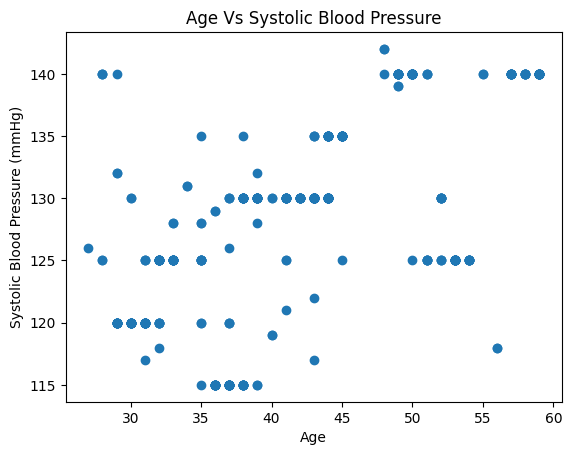

In [65]:
# create a scatter plot
plt.scatter(NewData['Age'], NewData['Systolic'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Age Vs Systolic Blood Pressure')
plt.show()

In [66]:
x=NewData['Age']
y=NewData['Systolic']
r=np.corrcoef(x,y)
print("The correlation between age and systolic blood pressure is approximately ",r[1,0])

The correlation between age and systolic blood pressure is approximately  0.6058784440490963


In [67]:
x=NewData['Age']
y=NewData['Systolic']
x1 = sm.add_constant(x)
results = sm.OLS(y, x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Systolic   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           7.62e-39
Time:                        01:26:59   Log-Likelihood:                -1210.4
No. Observations:                 374   AIC:                             2425.
Df Residuals:                     372   BIC:                             2433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7207      1.587     66.622      0.000     102.600     108.841
Age            0.5413      0.037     14.689      0.000       0.469       0.614
==============================================================================
Omnibus:                        7.988   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.892
Skew:                          -0.347   Prob(JB):                       0.0193
Kurtosis:                       3.153   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

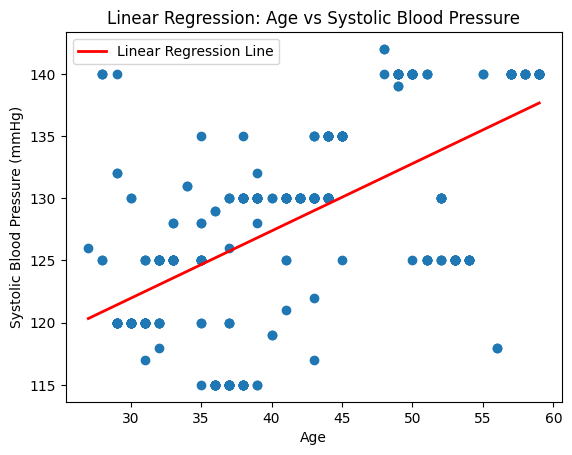

In [69]:
x=NewData['Age']
y=NewData['Systolic']
plt.scatter(x, y)
yreg=105.72 + (0.5413) * x
plt.plot(x, yreg, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Linear Regression: Age vs Systolic Blood Pressure')
plt.legend()

# Show plot
plt.show()